### import libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Data info

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,NO,YES,Yes,Private,Urban,228.69,"36,6",formerly smoked,YES
1,51676,Female,61.0,NO,NO,Yes,Self-employed,Rural,202.21,NaN,never smoked,YES
2,31112,Male,80.0,NO,YES,Yes,Private,Rural,105.92,"32,5",never smoked,YES
3,60182,Female,49.0,NO,NO,Yes,Private,Urban,171.23,"34,4",smokes,YES
4,1665,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,"24,0",never smoked,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,YES,NO,Yes,Private,Urban,83.75,NaN,never smoked,NO
5106,44873,Female,81.0,NO,NO,Yes,Self-employed,Urban,125.20,"40,0",never smoked,NO
5107,19723,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,"30,6",never smoked,NO
5108,37544,Male,51.0,NO,NO,Yes,Private,Rural,166.29,"25,6",formerly smoked,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 479.2+ KB


In [4]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [5]:
df.duplicated().sum()

0

### EDA

In [6]:
df.drop(['id'] , axis = 1 , inplace = True )

<Axes: xlabel='gender', ylabel='count'>

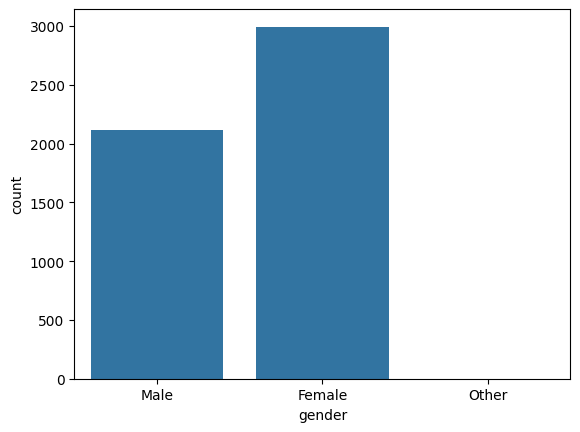

In [8]:
sns.countplot(x = df['gender'])

In [9]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [10]:
df['stroke'].value_counts()

stroke
NO     4861
YES     249
Name: count, dtype: int64

In [11]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,NO,NO,No,Private,Rural,143.33,"22,4",formerly smoked,NO


In [12]:
df.drop([3116] , axis = 0 , inplace = True )

In [14]:
df.select_dtypes('number').describe()

,age,avg_glucose_level
count,5109.000000,5109.000000
mean,43.229986,106.140399
std,22.613575,45.285004
min,0.080000,55.120000
25%,25.000000,77.240000
50%,45.000000,91.880000
75%,61.000000,114.090000
max,82.000000,271.740000


<Axes: xlabel='age', ylabel='Count'>

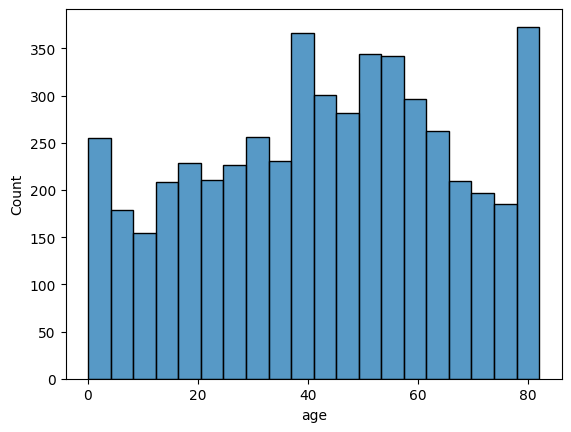

In [15]:
sns.histplot(x = df['age'])

<Axes: xlabel='age'>

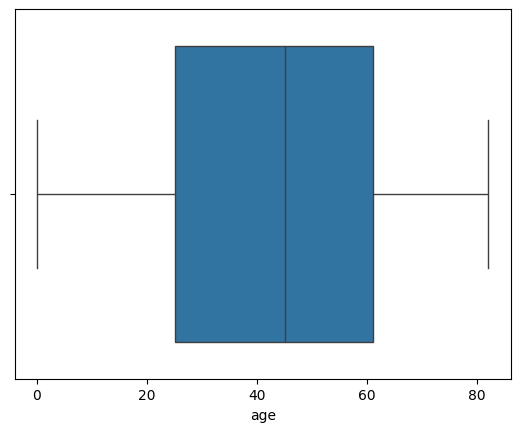

In [16]:
sns.boxplot(x = df['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

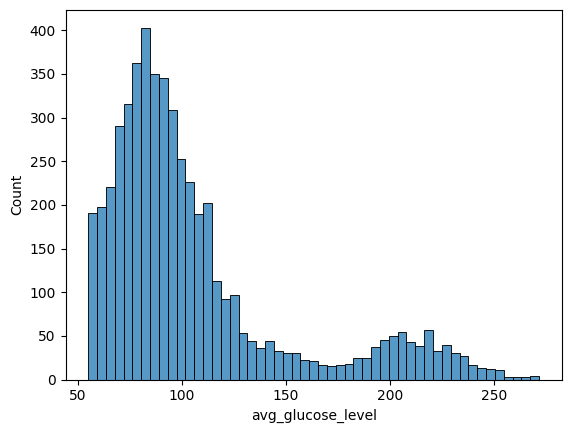

In [17]:
sns.histplot(x = df['avg_glucose_level'])

<Axes: xlabel='avg_glucose_level'>

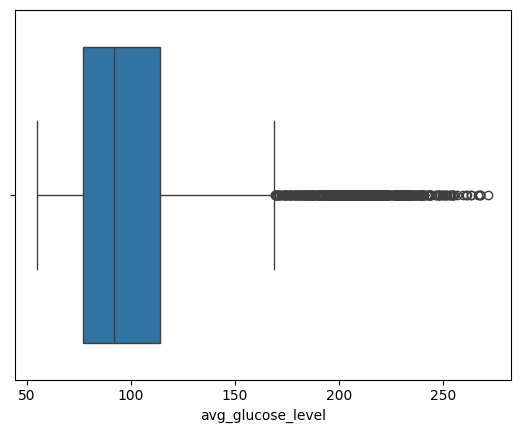

In [18]:
sns.boxplot(x = df['avg_glucose_level'])

<Axes: xlabel='hypertension', ylabel='count'>

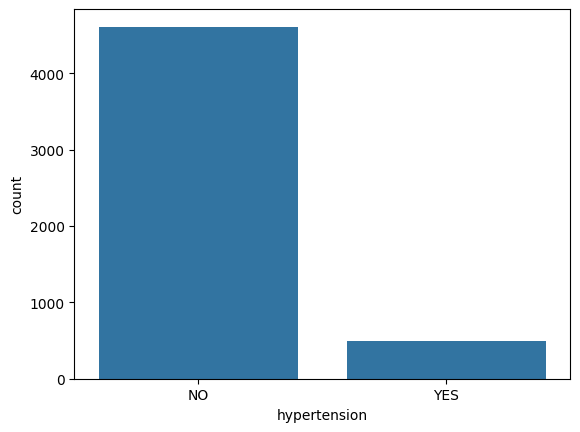

In [20]:
sns.countplot(x = df['hypertension'])

<Axes: xlabel='heart_disease', ylabel='count'>

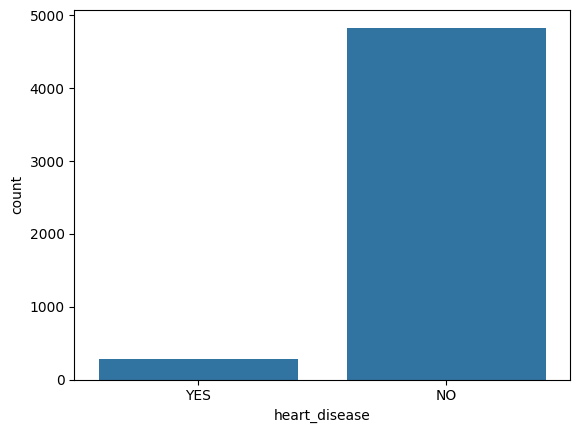

In [22]:
sns.countplot(x = df['heart_disease'])

In [23]:
df['heart_disease'].value_counts()

heart_disease
NO     4833
YES     276
Name: count, dtype: int64

In [24]:
df['hypertension'].value_counts()

hypertension
NO     4611
YES     498
Name: count, dtype: int64

In [25]:
df['stroke'].value_counts()

stroke
NO     4860
YES     249
Name: count, dtype: int64

In [27]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

<Axes: xlabel='ever_married', ylabel='count'>

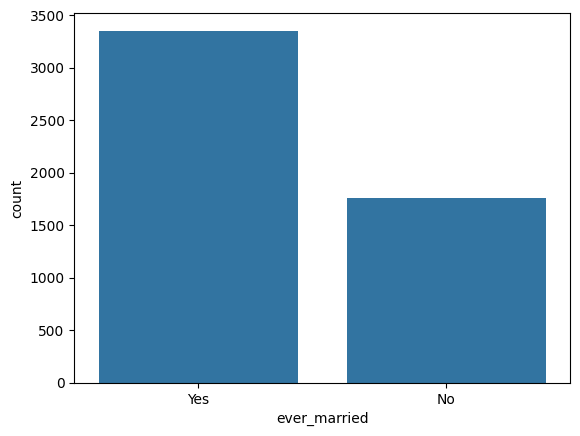

In [28]:
sns.countplot(x = df['ever_married'])

In [30]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [32]:
df[df['work_type'] == 'children']['age'].describe()

count    687.000000
mean       6.841339
std        4.533364
min        0.080000
25%        2.000000
50%        6.000000
75%       11.000000
max       16.000000
Name: age, dtype: float64

In [33]:
df[df['work_type'] == 'Never_worked']['age'].describe()

count    22.000000
mean     16.181818
std       2.342899
min      13.000000
25%      14.250000
50%      16.000000
75%      17.000000
max      23.000000
Name: age, dtype: float64

In [35]:
df['work_type'] = df['work_type'].apply(lambda x : 'Never_worked' if x == 'children' else x )

<Axes: xlabel='work_type', ylabel='count'>

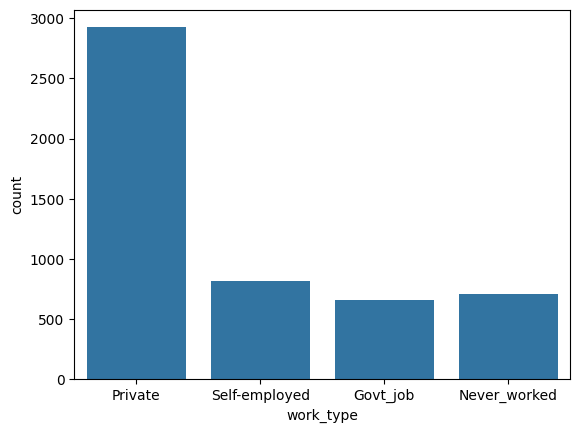

In [36]:
sns.countplot(x = df['work_type'])

In [40]:
df['Residence_type'].value_counts(normalize = True )

Residence_type
Urban    0.508123
Rural    0.491877
Name: proportion, dtype: float64

<Axes: xlabel='Residence_type', ylabel='count'>

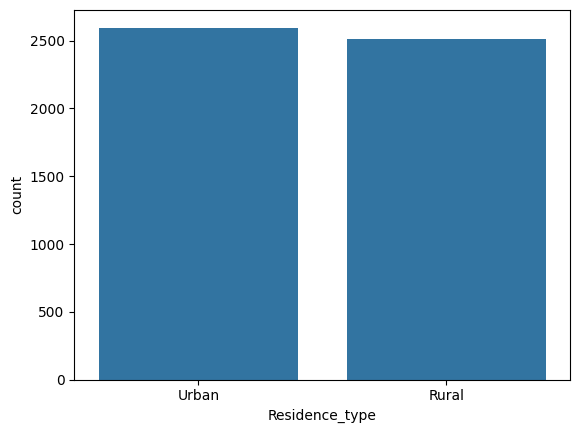

In [39]:
sns.countplot(x = df['Residence_type'])

In [45]:
df['bmi'].unique()

array(['36,6', nan, '32,5', '34,4', '24,0', '29,0', '27,4', '22,8',
       '24,2', '29,7', '36,8', '27,3', '28,2', '30,9', '37,5', '25,8',
       '37,8', '22,4', '48,9', '26,6', '27,2', '23,5', '28,3', '44,2',
       '25,4', '22,2', '30,5', '26,5', '33,7', '23,1', '32,0', '29,9',
       '23,9', '28,5', '26,4', '20,2', '33,6', '38,6', '39,2', '27,7',
       '31,4', '36,5', '33,2', '32,8', '40,4', '25,3', '30,2', '47,5',
       '20,3', '30,0', '28,9', '28,1', '31,1', '21,7', '27,0', '24,1',
       '45,9', '44,1', '22,9', '29,1', '32,3', '41,1', '25,6', '29,8',
       '26,3', '26,2', '29,4', '24,4', '28,0', '28,8', '34,6', '19,4',
       '30,3', '41,5', '22,6', '56,6', '27,1', '31,3', '31,0', '31,7',
       '35,8', '28,4', '20,1', '26,7', '38,7', '34,9', '25,0', '23,8',
       '21,8', '27,5', '24,6', '32,9', '26,1', '31,9', '34,1', '36,9',
       '37,3', '45,7', '34,2', '23,6', '22,3', '37,1', '45,0', '25,5',
       '30,8', '37,4', '34,5', '27,9', '29,5', '46,0', '42,5', '35,5',
       '2

In [46]:
df[df['bmi'] == 'NaN']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [47]:
df['bmi'].apply(lambda x : float(x.replace(',' , '.')) if type(x) == str else x)

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5109, dtype: float64

In [48]:
df['bmi'] = df['bmi'].apply(lambda x : float(x.replace(',' , '.')) if type(x) == str else x)

In [49]:
df['bmi'].isnull().mean()*100

3.9342337052260716

In [53]:
df[df['stroke'] == 'YES']['bmi'].isnull().sum()

40

In [54]:
df[df['stroke'] == 'NO']['bmi'].isnull().sum()

161

In [56]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='smoking_status'>

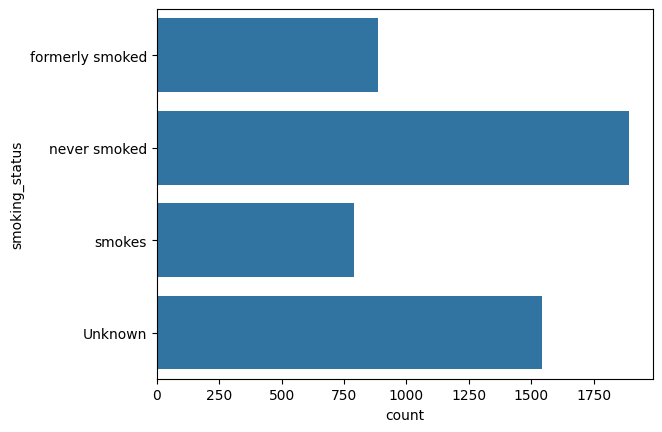

In [57]:
sns.countplot(y = df['smoking_status'])

<Axes: xlabel='stroke', ylabel='count'>

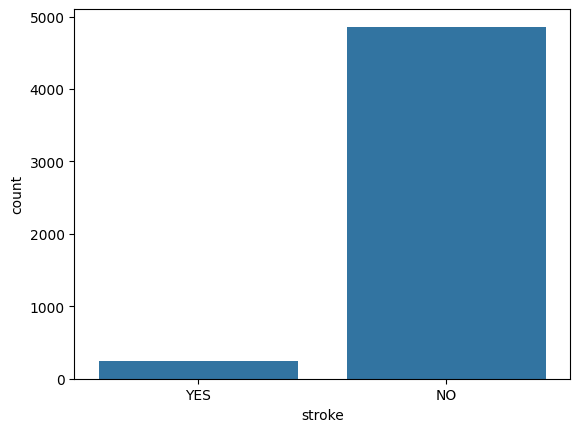

In [59]:
sns.countplot(x = df['stroke'])

<Axes: xlabel='gender', ylabel='count'>

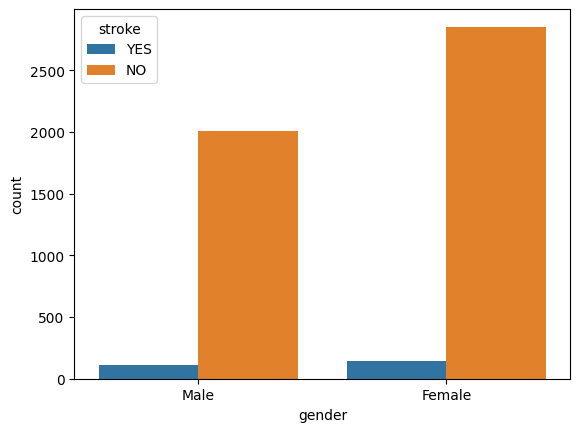

In [61]:
sns.countplot(x = df['gender'] , hue = df['stroke'])

<Axes: xlabel='age', ylabel='Count'>

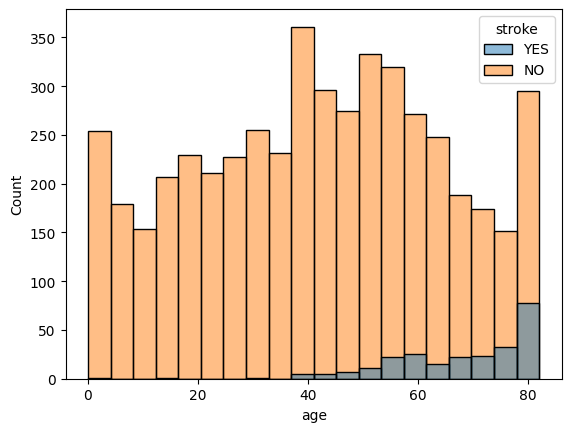

In [63]:
sns.histplot(x = df['age'] , hue = df['stroke'])

<Axes: xlabel='hypertension', ylabel='count'>

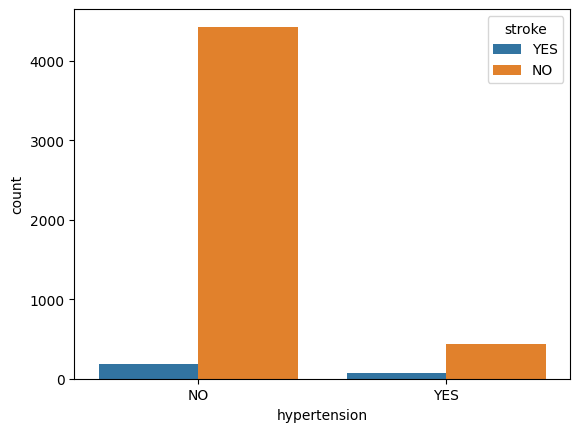

In [65]:
sns.countplot(x = df['hypertension'] , hue = df['stroke'])

<Axes: xlabel='heart_disease', ylabel='count'>

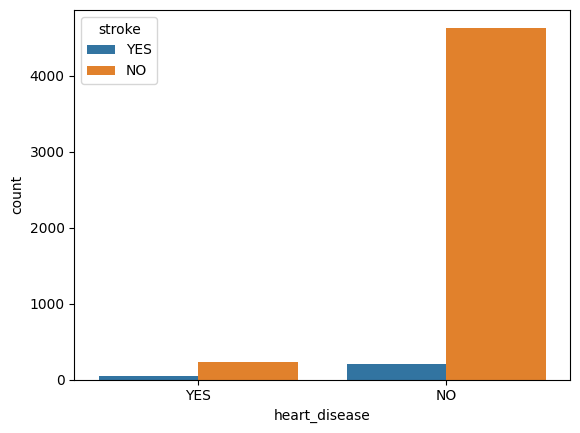

In [67]:
sns.countplot(x = df['heart_disease'] , hue = df['stroke'])

<Axes: xlabel='ever_married', ylabel='count'>

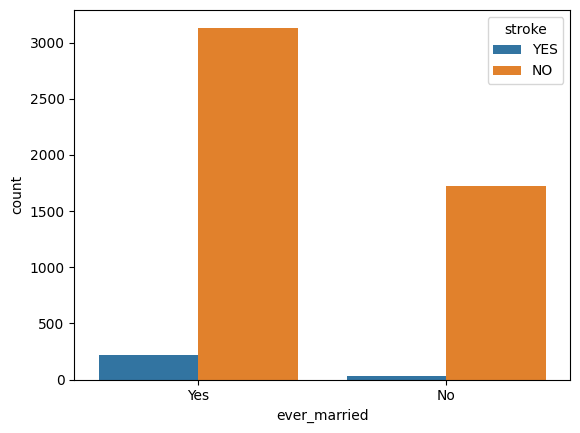

In [69]:
sns.countplot(x = df['ever_married'] , hue = df['stroke'])

<Axes: xlabel='work_type', ylabel='count'>

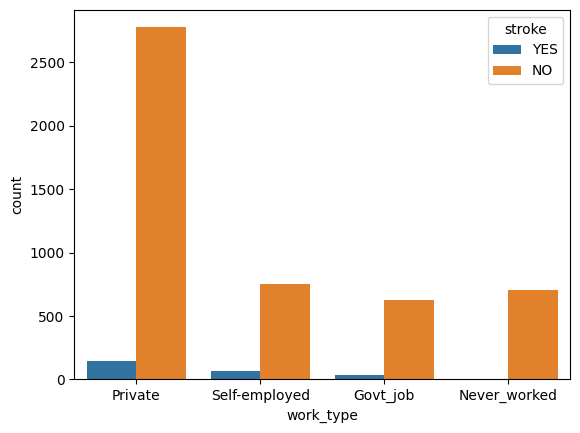

In [71]:
sns.countplot(x = df['work_type'] , hue = df['stroke'])

<Axes: xlabel='Residence_type', ylabel='count'>

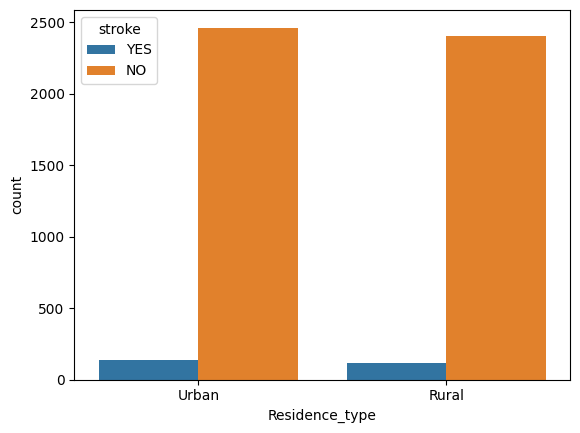

In [73]:
sns.countplot(x = df['Residence_type'] , hue = df['stroke'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

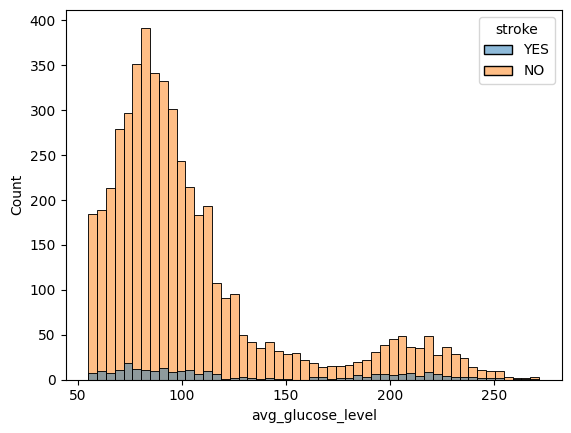

In [76]:
sns.histplot(x = df['avg_glucose_level'] , hue = df['stroke'])

In [ ]:
sns.histplot(x = df['avg_glucose_level'] , hue = df['stroke'])

<Axes: xlabel='bmi'>

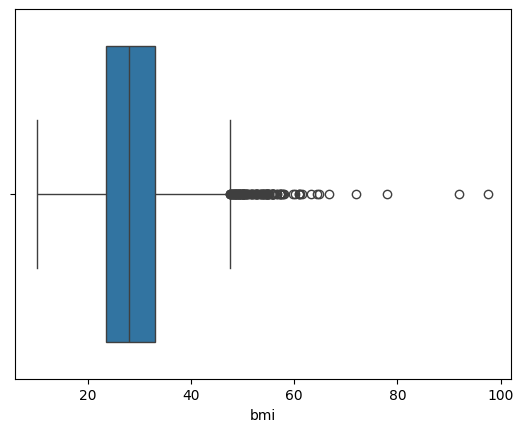

In [77]:
sns.boxplot(x = df['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

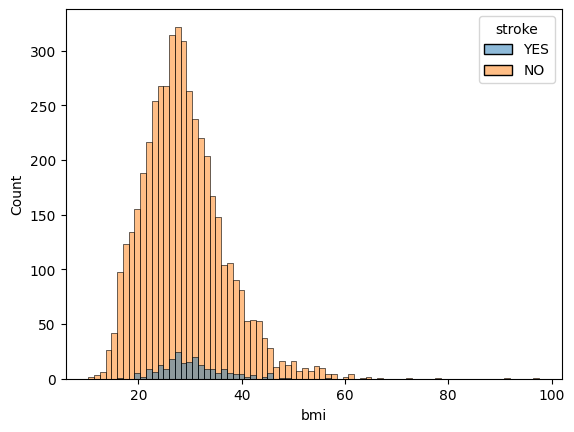

In [78]:
sns.histplot(x = df['bmi'] , hue = df['stroke'])

<Axes: xlabel='smoking_status', ylabel='count'>

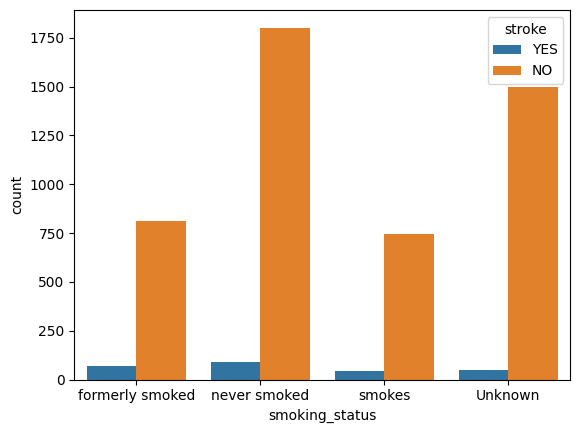

In [80]:
sns.countplot(x = df['smoking_status'] , hue = df['stroke'])

### Data preprocessing 
* cust in pandas categorization numerical columns to deal with outliers 

In [83]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score , recall_score , precision_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.tree import plot_tree , DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB , BernoulliNB , GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [84]:
for col in df.select_dtypes('object').columns :
    
    print(f'{col} -- {df[col].nunique()}')
    

gender -- 2
hypertension -- 2
heart_disease -- 2
ever_married -- 2
work_type -- 4
Residence_type -- 2
smoking_status -- 4
stroke -- 2


In [85]:
col_ohe = df.select_dtypes('object').columns[:-1]
col_ohe

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [90]:
df.reset_index(inplace = True , drop = True )

In [91]:
ohe = OneHotEncoder(sparse_output=False , drop = 'first')

In [94]:
ohe_df = pd.DataFrame(ohe.fit_transform(df[col_ohe]) , columns=ohe.get_feature_names_out())
ohe_df

,gender_Male,hypertension_YES,heart_disease_YES,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5105,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [97]:
df = pd.concat([df , ohe_df] , axis = 1  )
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,hypertension_YES,heart_disease_YES,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,NO,YES,Yes,Private,Urban,228.69,36.6,formerly smoked,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,Female,61.0,NO,NO,Yes,Self-employed,Rural,202.21,NaN,never smoked,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Male,80.0,NO,YES,Yes,Private,Rural,105.92,32.5,never smoked,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Female,49.0,NO,NO,Yes,Private,Urban,171.23,34.4,smokes,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,YES,NO,Yes,Private,Urban,83.75,NaN,never smoked,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5105,Female,81.0,NO,NO,Yes,Self-employed,Urban,125.20,40.0,never smoked,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5106,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,30.6,never smoked,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,Male,51.0,NO,NO,Yes,Private,Rural,166.29,25.6,formerly smoked,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [98]:
col_ohe

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [99]:
df.drop(col_ohe , axis = 1 , inplace = True )

In [101]:
df['stroke'] = df['stroke'].apply(lambda x : 1 if x == 'YES' else 0)

In [274]:
x , y = df.drop(['stroke'] , axis = 1 ) , df['stroke']

In [391]:
x_train , x_test , y_train , y_test = train_test_split(x,  y , test_size=0.15 , random_state=7 , stratify=y)

### Modeling 

In [392]:
knn = KNNImputer(n_neighbors=3)

In [393]:
x_train['bmi'] = knn.fit_transform(x_train[['bmi']])

In [394]:
x_test['bmi'] = knn.transform(x_test[['bmi']])

In [395]:
x_test.isnull().sum()

age                               0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
hypertension_YES                  0
heart_disease_YES                 0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [396]:
y_train.value_counts()

stroke
0    4130
1     212
Name: count, dtype: int64

In [397]:
sclr = StandardScaler()

In [398]:
x_train = sclr.fit_transform(x_train)
x_test = sclr.transform(x_test)

In [399]:
sm = SMOTE(sampling_strategy={1 : 4000})

In [400]:
x_train , y_train = sm.fit_resample(x_train , y_train)

In [401]:
Model = DecisionTreeClassifier(max_depth=3)

In [402]:
Model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [403]:
y_train_prd = Model.predict(x_train)
y_test_prd = Model.predict(x_test)

In [404]:
accuracy_score(y_true=y_train , y_pred=y_train_prd)

0.7900369003690036

In [405]:
accuracy_score(y_true=y_test , y_pred=y_test_prd)

0.7822685788787483

In [406]:
print(f'Train recall : {recall_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test recall : {recall_score(y_true=y_test , y_pred=y_test_prd)}')

Train recall : 0.82125
Test recall : 0.7837837837837838


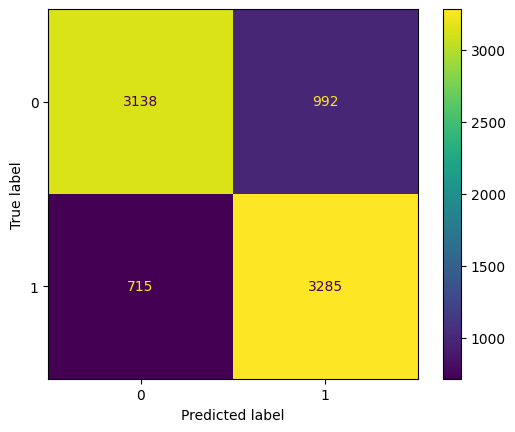

In [407]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_prd)).plot()

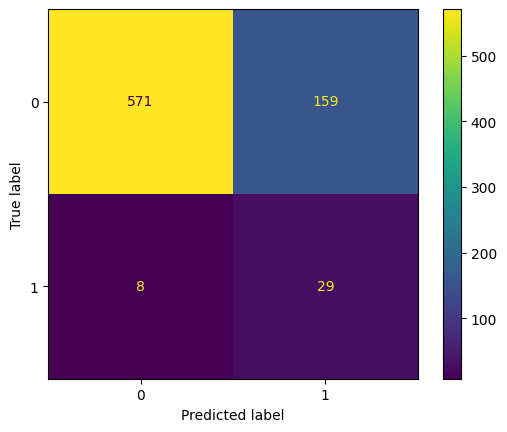

In [408]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_prd)).plot()

In [236]:
plt.figure(figsize=(100 , 100))
_ = plot_tree(Model , filled=True )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

In [237]:
models = [
    ('lr' , LogisticRegression()),
    ('svm' , SVC()),
    ('knnc' , KNeighborsClassifier()),
    ('DT' , DecisionTreeClassifier()),
    ('RF' , RandomForestClassifier())
]

In [239]:
for model in models :
    
    model[1].fit(x_train , y_train)
    
    
    y_train_prd = model[1].predict(x_train)
    y_test_prd = model[1].predict(x_test)
    
    print(model[0])
    print(f'Train recall : {recall_score(y_true=y_train , y_pred=y_train_prd)}')
    print(f'Test recall : {recall_score(y_true=y_test , y_pred=y_test_prd)}')
    
    print('*'*50)

lr
Train recall : 0.82725
Test recall : 0.8918918918918919
**************************************************
svm
Train recall : 0.95075
Test recall : 0.5675675675675675
**************************************************
knnc
Train recall : 0.994
Test recall : 0.35135135135135137
**************************************************
DT
Train recall : 1.0
Test recall : 0.2972972972972973
**************************************************
RF
Train recall : 1.0
Test recall : 0.16216216216216217
**************************************************


In [240]:
lr = LogisticRegression()

In [241]:
lr.fit(x_train , y_train)

LogisticRegression()

In [243]:
y_train_prd = lr.predict(x_train)
y_test_prd = lr.predict(x_test)

print(model[0])
print(f'Train recall : {recall_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test recall : {recall_score(y_true=y_test , y_pred=y_test_prd)}')

RF
Train recall : 0.82725
Test recall : 0.8918918918918919


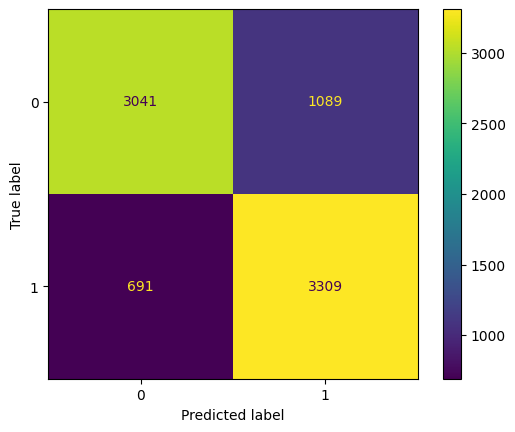

In [244]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_prd)).plot()

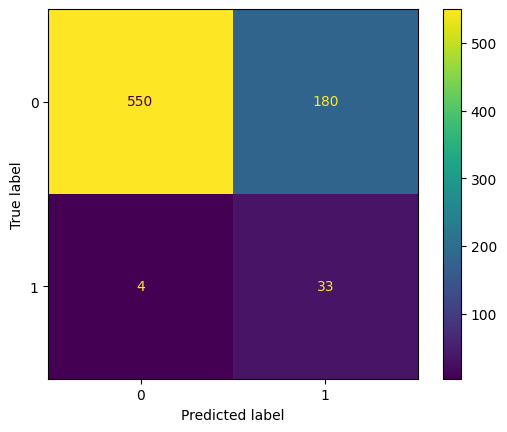

In [245]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_prd)).plot()

In [409]:
rm = RandomForestClassifier(n_estimators=3 , max_depth=3)

In [410]:
rm.fit(x_train , y_train)

RandomForestClassifier(max_depth=3, n_estimators=3)

In [411]:
y_train_prd = rm.predict(x_train)
y_test_prd = rm.predict(x_test)

print(f'Train recall : {recall_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test recall : {recall_score(y_true=y_test , y_pred=y_test_prd)}')

Train recall : 0.88425
Test recall : 0.8648648648648649


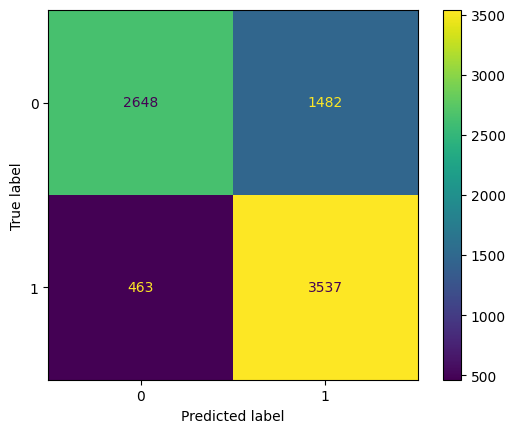

In [412]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_prd)).plot()

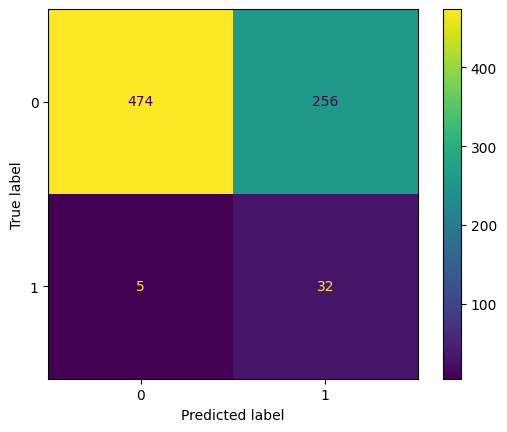

In [413]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_prd)).plot()